In [21]:
%%writefile Detections2Features.py
import sys
import numpy as np
import pickle as pkl
import cv2

if __name__=='__main__':
    DATA_DIR =sys.argv[1]

DATA_DIR='/Users/yoavfreund/projects/butons/data/164'
print('DATA_DIR=%s'%(DATA_DIR))

with open(DATA_DIR+'/extracted_cells.pkl','br') as pkl_file:
    E=pkl.load(pkl_file)
    Examples=E['Examples']

df_dict=None
thresh=2000
for i in range(len(Examples)):
    e=Examples[i]

    Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))

    if Stats[1] is None:
        continue
    seg=Stats[1]

    # Isolate the connected component at the middle of seg
    middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
    middle_seg=seg[middle[0],middle[1]]
    middle_seg_mask = np.uint8(seg==middle_seg)

    # Calculate Moments
    moments = cv2.moments(middle_seg_mask)
    # Calculate Hu Moments
    huMoments = cv2.HuMoments(moments)

    features={'h%d'%i:huMoments[i,0]  for i in range(7)}
    features.update(moments)

    for key in ['animal','section','index','label','area','height2','width2']:
        features[key]=e[key]

    features['row']=e['row_center']+e['origin'][0]
    features['col']=e['col_center']+e['origin'][0]

    if df_dict==None:
        df_dict={}
        for key in features:
            df_dict[key]=[]

    for key in features:
        df_dict[key].append(features[key])


import pandas as pd
df=pd.DataFrame(df_dict)
outfile=DATA_DIR+'/puntas.csv'
print('df shape=',df.shape,'output_file=',outfile)

df.to_csv(outfile)

Overwriting Detections2Features.py


In [20]:
e

{'animal': 'DK55',
 'section': 164,
 'index': 3838,
 'label': 0,
 'area': 1,
 'row_center': 5507,
 'origin': array([20400, 30000], dtype=int32),
 'height2': 50,
 'col_center': 867,
 'width2': 50,
 'image': array([[-213.23662 , -213.55351 , -213.87042 , ...,  264.79837 ,
          264.35217 ,  263.90594 ],
        [-212.8326  , -213.1473  , -213.46199 , ...,  265.4374  ,
          264.99405 ,  264.5507  ],
        [-212.42857 , -212.74107 , -213.05357 , ...,  266.07645 ,
          265.63593 ,  265.19543 ],
        ...,
        [  68.54266 , -130.72748 , -109.997635, ...,  419.47955 ,
          306.3514  ,  331.22327 ],
        [-104.17049 ,   22.558258,   12.287003, ...,  576.8917  ,
          324.76743 ,  442.64313 ],
        [-156.88365 ,  104.843994,   74.571625, ...,  570.3039  ,
          328.18344 ,  583.063   ]], dtype=float32)}

In [16]:
!head $DATA_DIR/puntas.csv

,h0,h1,h2,h3,h4,h5,h6,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,index,label,area,height2,width2
0,0.16909452653254692,0.0030094991945560407,8.595678911552031e-05,1.3515799993096256e-06,1.0145078461049756e-11,4.9236948474367563e-08,-1.0454986261521404e-11,66.0,3285.0,3299.0,163897.0,164317.0,165243.0,8196729.0,8204049.0,8236339.0,8293913.0,393.59090909091174,116.77272727273521,342.9848484848626,-51.86776859499514,58.093663911253316,70.49311294711879,-21.40955004747957,0.09035603973620564,0.02680732949328173,0.07873848679634128,-0.0014656751538404413,0.0016416059934087294,0.001991988607997097,-0.0006049893105006667,1,0,66,50,50
1,0.1735983288380241,0.004454153670905496,1.1538386544119013e-05,3.201714542295251e-07,-6.063278058438364e-13,-2.050287300613722e-08,1.0518794211984896e-13,152.0,7508.0,7638.0,373344.0,376676.0,385332.0,18686798.0,18701012.0,18973174.0,19515942.0,2488.3157894737087,-601.0,1522.5,-250.0387811660766

In [80]:
import cv2
thresh=2000
Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))
Stats[0]

3

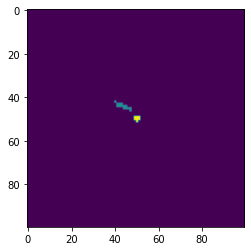

In [81]:
seg=Stats[1]
imshow(seg)


In [82]:
middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
middle

array([50, 50], dtype=int16)

In [83]:
middle_seg=seg[middle[0],middle[1]]
middle_seg

2

In [86]:
Stats[2][middle_seg],e['area']

(array([49, 49,  3,  3,  7], dtype=int32), 7)

In [122]:
for key in ['index','label','area','height2','width2']:
    features[key]=e[key]
features

{'h0': 0.19996952888869568,
 'h1': 0.004807484490333493,
 'h2': 0.0029203280141626353,
 'h3': 0.00016871685648051798,
 'h4': 1.0003237196370746e-07,
 'h5': 8.329713986313898e-06,
 'h6': 6.339290075281958e-08,
 'm00': 1599.0,
 'm10': 82733.0,
 'm01': 99098.0,
 'm20': 4458461.0,
 'm11': 5169807.0,
 'm02': 6475062.0,
 'm30': 248329187.0,
 'm21': 280669813.0,
 'm12': 341828093.0,
 'm03': 443725004.0,
 'mu20': 177817.29205753654,
 'mu11': 42430.618511569686,
 'mu02': 333464.99937460944,
 'mu30': -754346.4337663054,
 'mu21': -33997.44442487601,
 'mu12': 1546114.6932338718,
 'mu03': 1100161.5409317613,
 'nu20': 0.06954678602579416,
 'nu11': 0.016595197870921393,
 'nu02': 0.1304227428629015,
 'nu30': -0.007378187406689129,
 'nu21': -0.00033252562097077954,
 'nu12': 0.015122393966866952,
 'nu03': 0.010760570559204253,
 'index': 66,
 'label': 1,
 'area': 1599,
 'height2': 66,
 'width2': 50}

In [ ]:
# Calculate Moments
moments = cv2.moments(im)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)

In [30]:
def plot_dist(uimg):
    H=uimg.flatten()
    H=np.sort(H)

    H=H[0:-1:10]
    plt.figure()
    plt.plot(H,np.arange(0,1,1./H.shape[0]))
    plt.grid()
    plt.figure()
    plt.hist(H,bins=100);

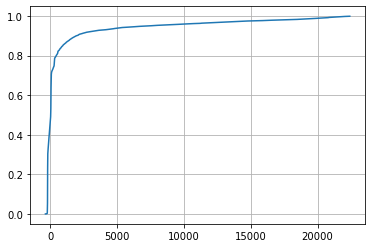

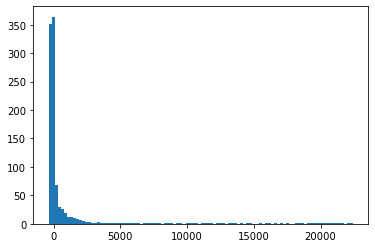

In [31]:
plot_dist(e['image']);

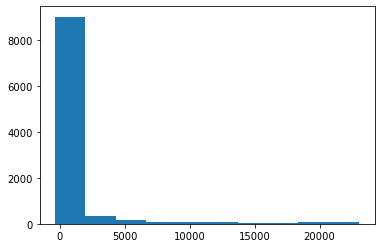

In [29]:
hist(e['image'].flatten());